In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer



# 유방암 데이터셋 로드

In [37]:
cancer_data = load_breast_cancer()
cancer_data

cancer_features = cancer_data.data
cancer_labels = cancer_data.target

cancer_data['feature_names']
cancer_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# test와 train으로 분리

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, y_train, X_test, y_test = train_test_split(cancer_features, cancer_labels,
                                                    test_size = 0.1, random_state=20)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(512, 30) (512,)
(57, 30) (57,)


## 표준화

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [41]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(y_train)
train_scaled.shape

(512, 30)

# PCA 주성분 2개 선택

In [42]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [43]:
train_pca = pca.fit_transform(train_scaled)
#fit_transform:학습데이터에 대해 PCA학습하고 해당 데이터 변환하는 역할 수행
train_pca
test_pca = pca.transform(test_scaled)
#transform:학습된 pca 모델을 사용하여 테스트 데이터를 주성분 변환
#fit_transform은 학습데이터에 대해 PCA를 학습하고(fit) 학습된 모델을 사용하여 데이터를 주성분으로 변환(transform)=> 주어진 학습데이터의 주성분으로 이루어진 행렬이 저장
# transform은 학습된 PCA모델을 재사용하여 새로운 데이터에 대한 변환을 수행하는것 => 주어진 테스트 데이터의 주성분으로 이루어진 행렬이 저장
test_pca

array([[-1.14659333,  3.15636122],
       [-2.57060122, -3.17186281],
       [ 5.62920063, -0.91058246],
       [-2.7666803 ,  0.01383626],
       [ 1.81629622,  2.29341005],
       [ 8.22079187,  0.32518372],
       [ 3.9766408 ,  0.19204215],
       [-3.29227754,  0.41891769],
       [ 1.23326215,  6.30545934],
       [10.42608576, -3.89148718],
       [ 1.24425807, -2.45020227],
       [-4.09592024, -0.74589251],
       [-0.18572829,  2.03818124],
       [ 4.83259965, -0.25435764],
       [-0.97971286,  1.25017845],
       [-0.72609822,  2.22469311],
       [-4.4646    ,  0.51210551],
       [-1.39752709, -3.55806126],
       [ 2.27538177,  0.50667881],
       [ 0.35130221,  7.93019371],
       [-2.85125466,  0.25445861],
       [-5.06199664, -0.25528281],
       [ 1.25410657, -1.68054094],
       [-0.31963124, -1.71428317],
       [ 3.99589687, -1.50822267],
       [ 5.89335543,  0.60095447],
       [ 6.11070806,  9.45176642],
       [-1.83575246, -0.68058043],
       [-1.13146384,

## SVM 분류기 훈련

In [44]:
from sklearn.svm import SVC
from collections import Counter

In [45]:
pca_clf = SVC(kernel = 'rbf', gamma=0.5, C=0.8)
# kernel:SVM 커널의 종류를 지정 rbf => Radial Baisis Function
# gamma : rbf커널의 계수, 값이 클수록 훈련샘플의 영향범위가 작아지고, 값이 작을수록 영향 범위가 커짐
# C: SVM 규제 매개변수, 오분류된 데이터 포인트에 대한 페널티를 조절한다.
# 값이 클수록 모델이 오분류에 민감해지고, 값이 작을수록 부정확도에 대한 패널티가 작아진다
pca_clf

SVC(C=0.8, gamma=0.5)

In [46]:
pca_clf.fit(train_pca,X_test)

SVC(C=0.8, gamma=0.5)

In [54]:
# 기존
origin_clf = SVC(kernel='rbf', gamma= 0.5, C=0.8)
origin_clf
origin_clf.fit(train_scaled, X_test)

SVC(C=0.8, gamma=0.5)

In [47]:
X_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [48]:
# PCA로 축소된 데이터와 해당 데이터에 대한 분류 경계 시각화

colors = ['red','blue'] # 0:빨간색, 1: 파란색

# np.vstack((a,b))
# np.concatenate((a,b))
# np.concatenate((a,b))

combined_features = np.vstack((train_pca, test_pca))
# train데이터 test데이터를 pca 축소한뒤 vstack를 이용하여 수직방향으로 쌓아서 하나의 배열로 반듬
combined_labels = np.concatenate((X_test,y_test))
# train데이터와 test 데이터의 레이블을 하나의 배열로 합침
combined_features

array([[-0.72896719,  0.67573117],
       [-1.48968644, -1.03754869],
       [-1.5799514 ,  1.75307834],
       ...,
       [-1.93193254, -0.78751643],
       [-1.32861378,  3.35566018],
       [-3.57037933, -1.23552085]])

In [49]:
combined_labels


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

[-6.48350283 -6.46350283 -6.44350283 ... 17.31649717 17.33649717
 17.35649717]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


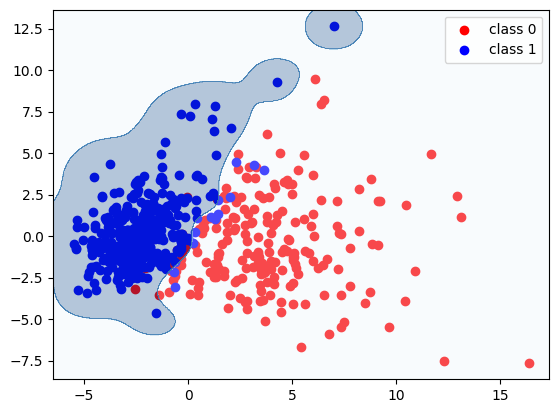

In [51]:
figure, axes = plt.subplots()

for i in range(2):
    indices = np.where(combined_labels == i)
    axes.scatter(combined_features[indices, 0], combined_features[indices, 1],
                 color = colors[i], label = f"class {i}")

#분류 경계 그리기
#격자 간격 설정
h = .02
x_min, x_max = combined_features[:, 0].min() - 1, combined_features[:, 0].max() + 1
y_min, y_max = combined_features[:, 1].min() - 1, combined_features[:, 1].max() + 1

#격자 포인트 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(xx.ravel())
# print(yy)

#격자 내 각 점에 대한 예측 수행(svm)
pca_clf.fit(train_pca, X_test)
Z = pca_clf.predict(np.c_[xx.ravel(), yy.ravel()])
#ravel() : 다차원 배열을 1차원 배열로 만드는 넘파이 함수

#결과를 격자 모양으로 변형
Z = Z.reshape(xx.shape)

#분류경계를 등고선 그래프로 시각화
plt.contourf(xx, yy, Z, alpha = 0.3, cmap = 'Blues')
#alpha : 등고선 그래프의 투명도 조정하는 매개변수
#cmap : 등고선 색상 맵을 설정하는 매개변수

print(Z)


plt.legend()
plt.show()
# # colors = ['red', 'blue'] #레이블0 빨간색, 레이블1 파란색

- 격자를 통해 데이터 공간을 분할하고 각 영역에 대한 예측결과를 시각화 함으로써 분류 경계를 보다 명확하게 확인 할 수 있다
- 격자 내 각 점에 대한 예측 수행을 통해 각 격자 포인트에서의 클래스를 예측할 수 있다
- .predict(np.c_[xx.ravel(), yy.ravel()] => 격자 포인트를 1차원 배열로 펼쳐서 예측을 수행함

In [62]:
xx.shape

(1114, 1193)

# 분류기 평가

In [58]:
pca_test_acc =  Counter(pca_clf.predict(test_pca)==y_test)

print(pca_test_acc)
# Counter 정확하게 분류된 샘플의 개수를 계산

orig_test_acc = Counter(origin_clf.predict(test_scaled) == y_test)
print(orig_test_acc)

Counter({True: 55, False: 2})
Counter({True: 37, False: 20})


In [61]:
p_acc = pca_clf.score(test_pca, y_test)
o_acc = origin_clf.score(test_scaled, y_test)

print(f"PCA 분석을 사용한 테스트 데이터셋의 정확도 : {p_acc:.3f}")
print(f"PCA 분석을 사용하지 않은 테스트 데이터셋의 정확도 : {o_acc:.3f}")

PCA 분석을 사용한 테스트 데이터셋의 정확도 : 0.965
PCA 분석을 사용하지 않은 테스트 데이터셋의 정확도 : 0.649
